In [2]:
import sys
import json
import os
sys.path.append(os.environ["CODE_REPOSITORY"])
from code_repository.hotones.thetools import *
import matplotlib.pyplot as plt
from snudda.utils.load import SnuddaLoad

In [3]:
external = os.path.join("/media","jofrony","2TB", "dardel","current_bgd2","population_unit", "surround_inhibition", "supercomputer", "networks")

In [4]:
cell_ids = json.load(open(os.path.join("..", "..","..","..","networks", "pdc_network_2022-08-31", "cell_ids_dardel_p1.json")))

In [5]:
folder = "frequency"

In [6]:
parameters = {"start": 0, "end": 2.5}

In [7]:
e = Experiments()
e.add_experiment(name="p1_with_ex",
                 color="black",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31"),
                 output="network_output_external-input-dardel-2022-10-25-12-00-58-p1_empty.hdf5")
e.add_experiment(name="p1_with_ex_current_injection_presynaptic",
                 color="red",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31"),
                 output="network_output_90mV_external-input-dardel-2022-10-25-12-00-58-p1_cell_ids_current_injection_dardel_2022-10-25-12-06-04_presynaptic_to_p1.hdf5")

   

In [8]:
sl = LoadSimulations(experiments=e)
sl.load_network_file(load_synapses=False)

Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/surround_inhibition/supercomputer/networks/pdc_network_2022-08-31/simulation/network_output_external-input-dardel-2022-10-25-12-00-58-p1_empty.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/surround_inhibition/supercomputer/networks/pdc_network_2022-08-31/simulation/network_output_90mV_external-input-dardel-2022-10-25-12-00-58-p1_cell_ids_current_injection_dardel_2022-10-25-12-06-04_presynaptic_to_p1.hdf5


In [9]:
neuron_type="SPN"
specific_trace_ids = {k: cell_ids["iSPN"][::10]+cell_ids["dSPN"] for k in e.experiments}
dt_step=0.5

In [13]:
%%time
dendritic_voltage = dendrite_voltage(data_obj=sl, 
                                     neuron_type=neuron_type, 
                                     specific_trace_ids=specific_trace_ids,
                                     interval=[0, 2.5], 
                                     dt_step=dt_step)

average_dendritic_voltages = average_dendritic_voltage(dvoltage=dendritic_voltage)


  SPN and 187 traces
  SPN and 187 traces
CPU times: user 15.4 s, sys: 1.38 s, total: 16.8 s
Wall time: 36.1 s


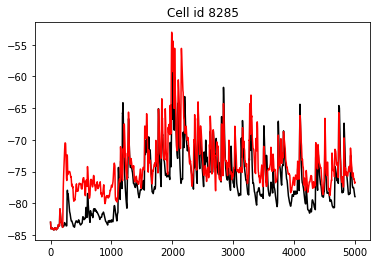

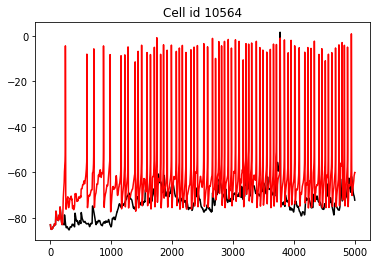

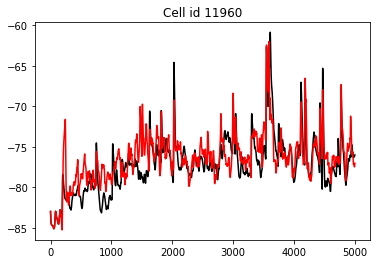

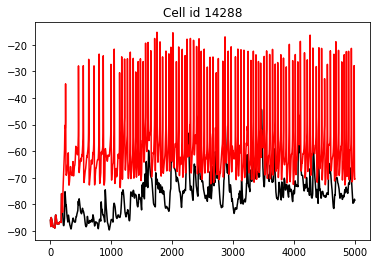

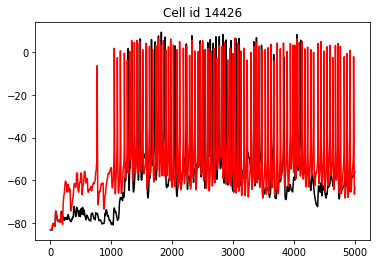

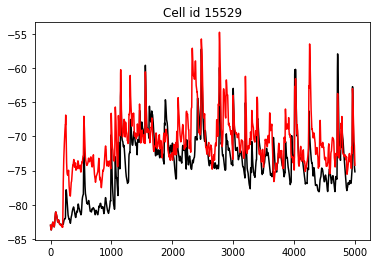

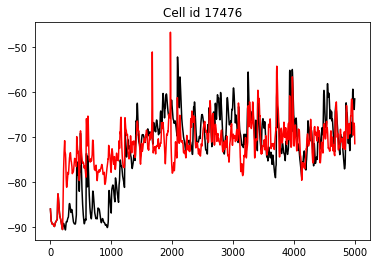

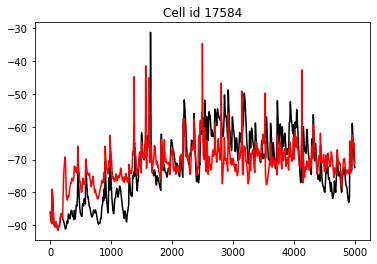

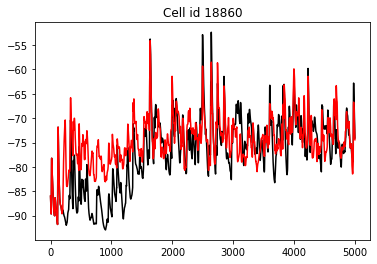

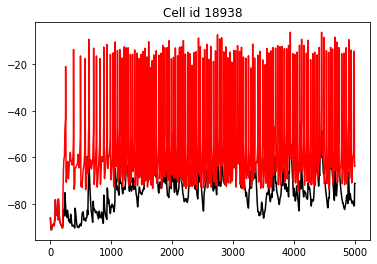

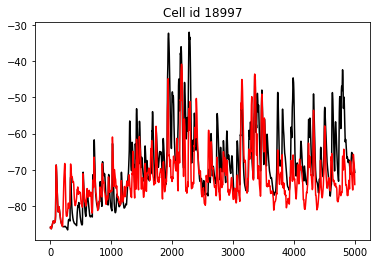

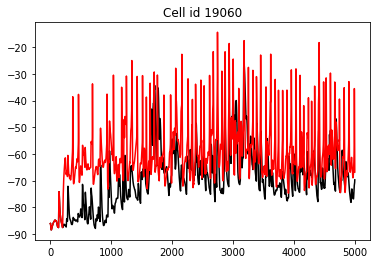

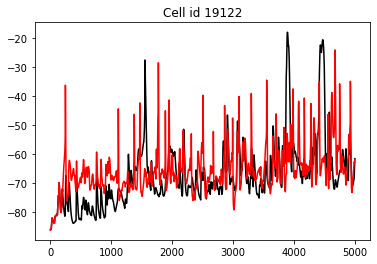

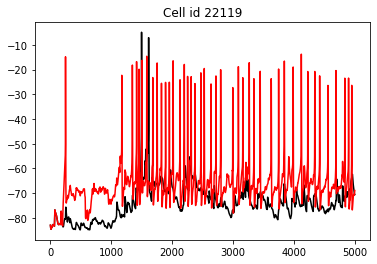

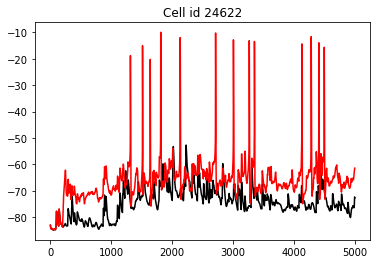

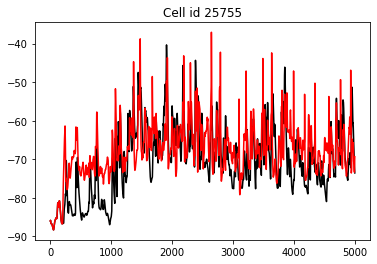

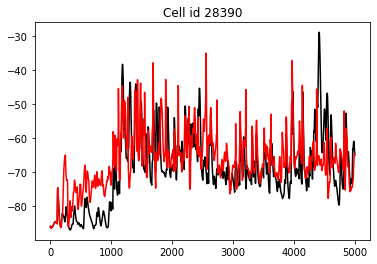

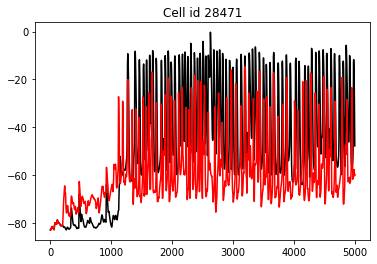

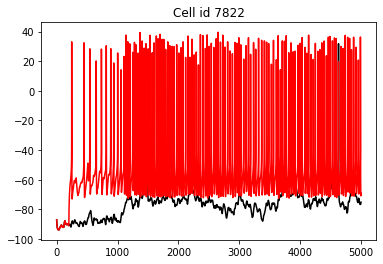

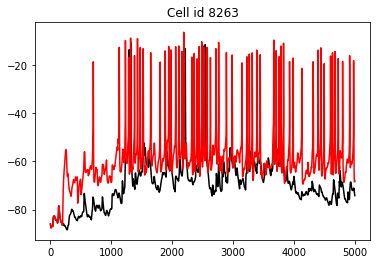

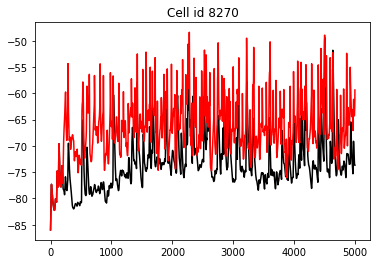

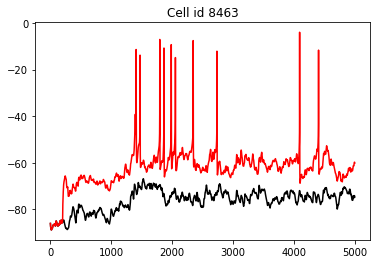

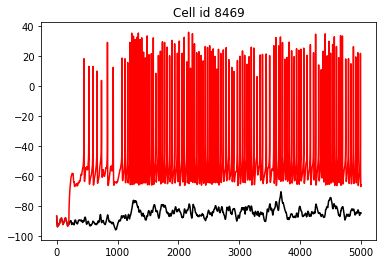

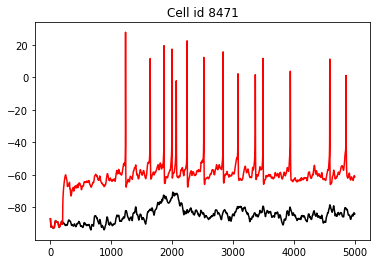

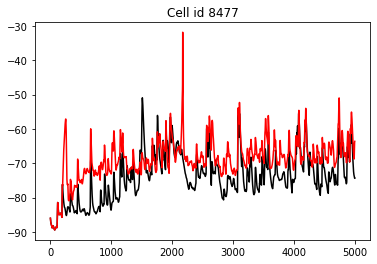

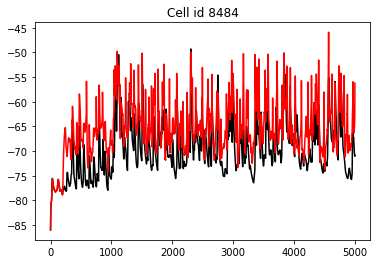

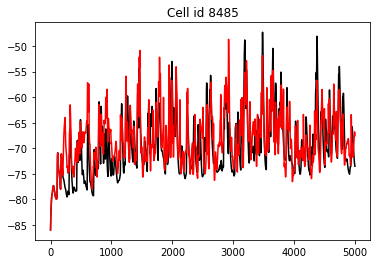

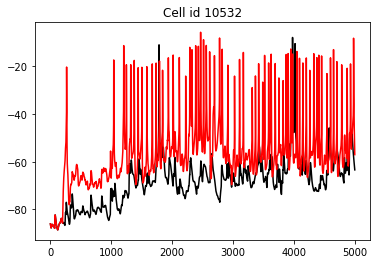

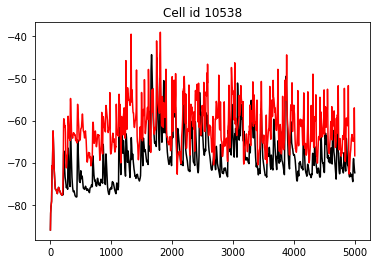

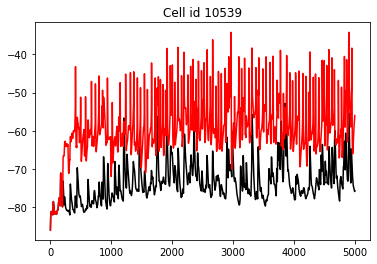

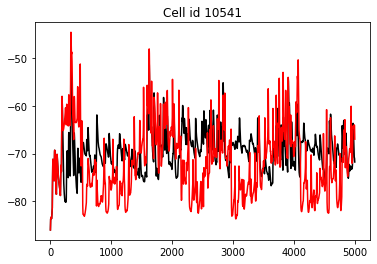

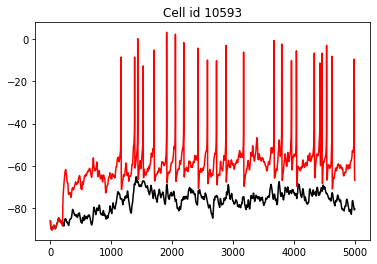

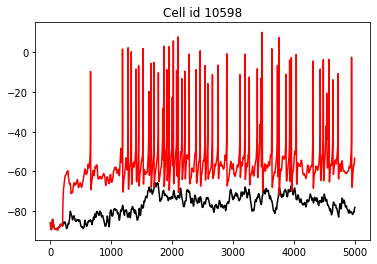

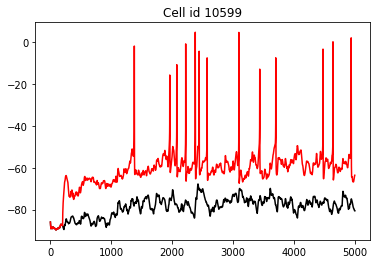

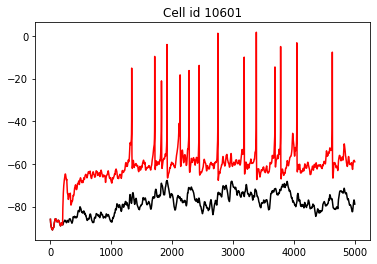

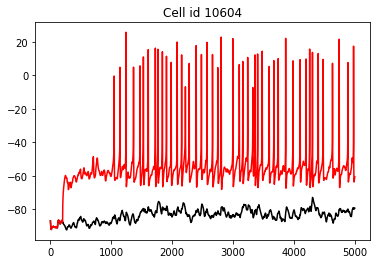

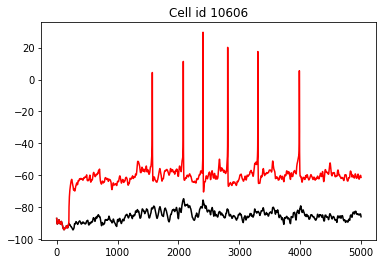

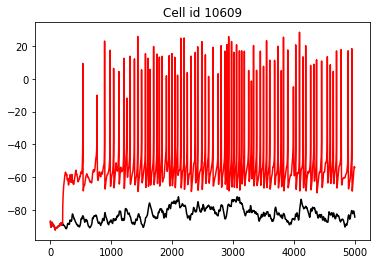

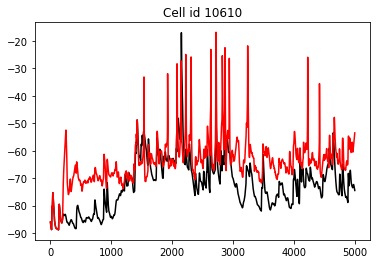

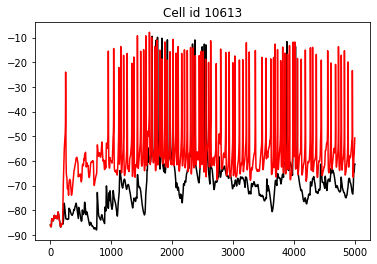

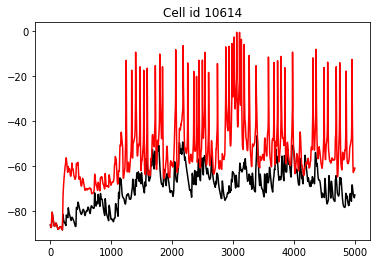

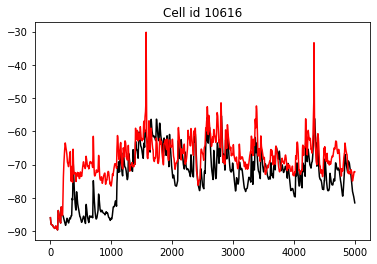

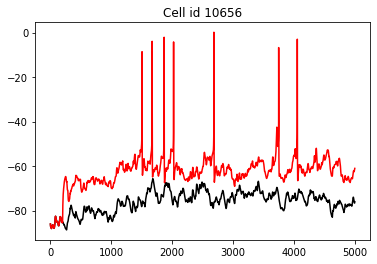

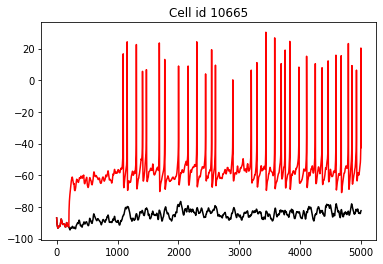

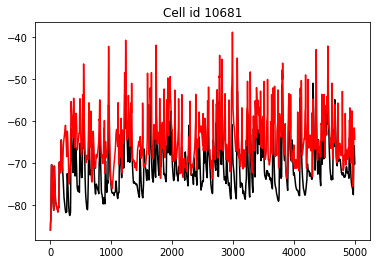

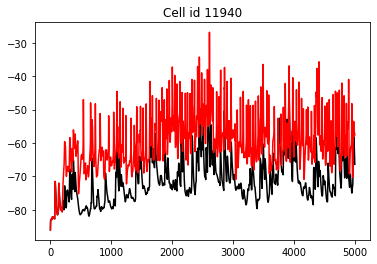

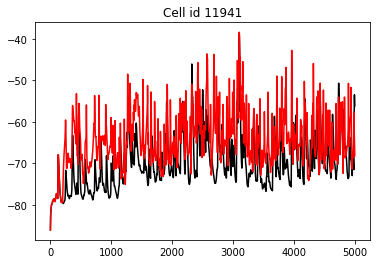

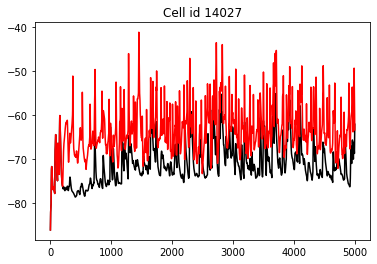

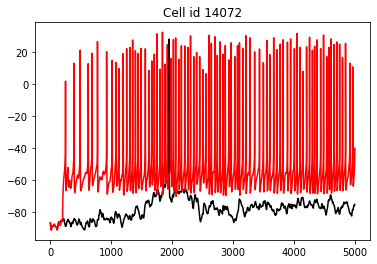

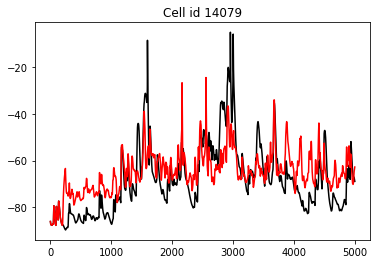

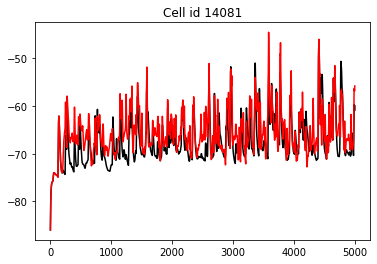

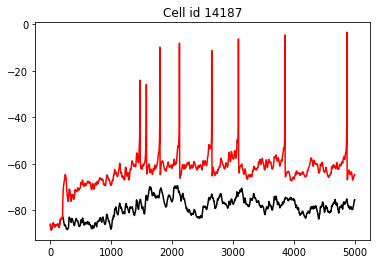

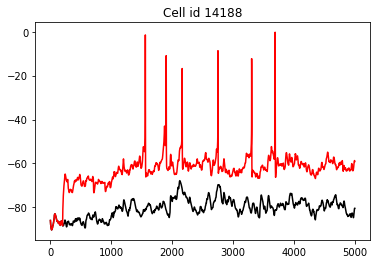

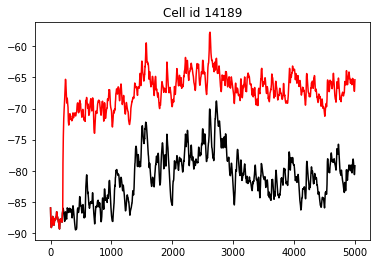

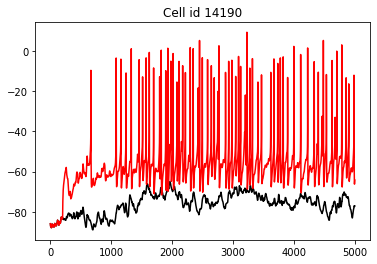

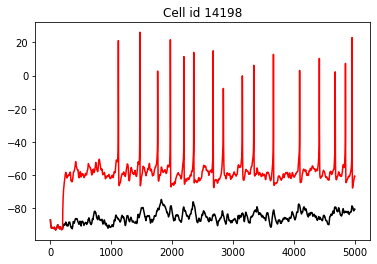

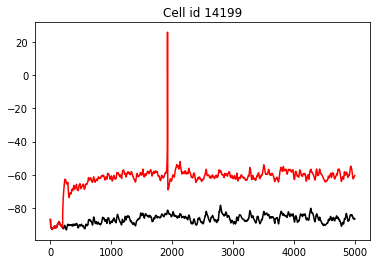

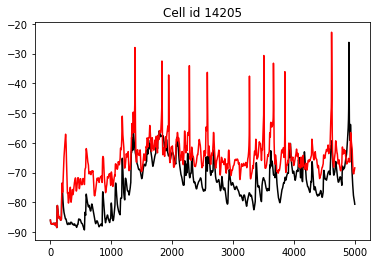

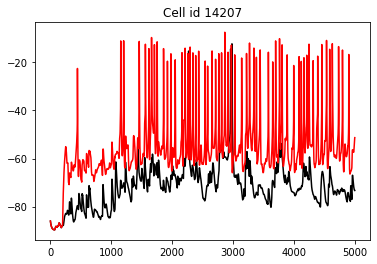

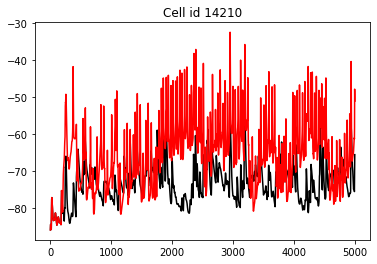

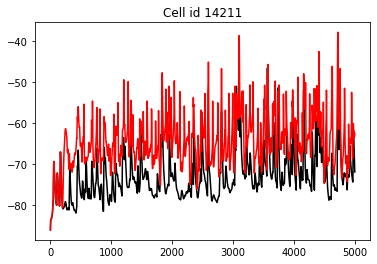

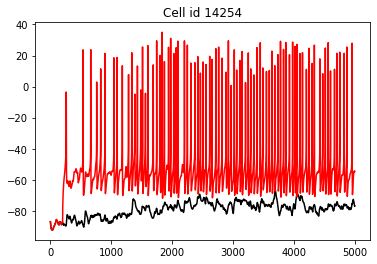

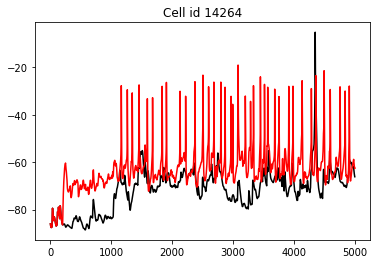

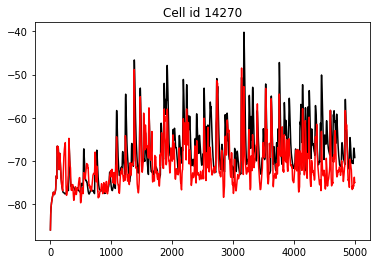

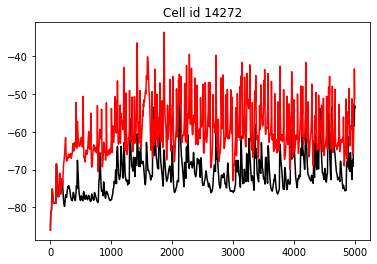

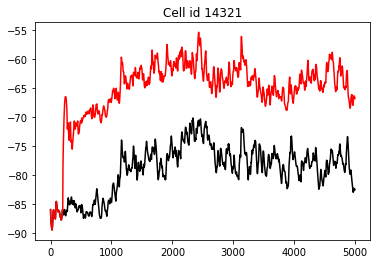

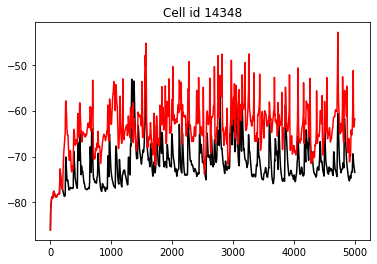

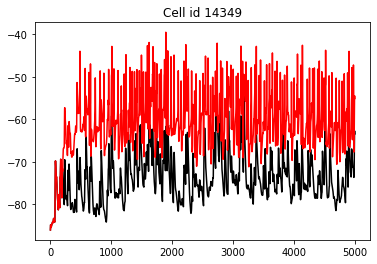

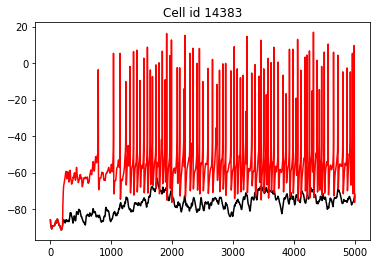

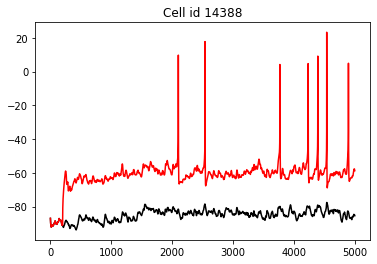

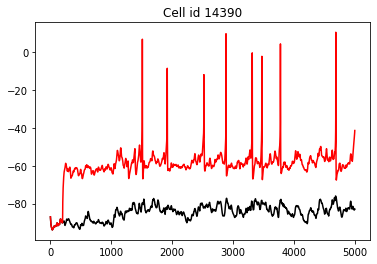

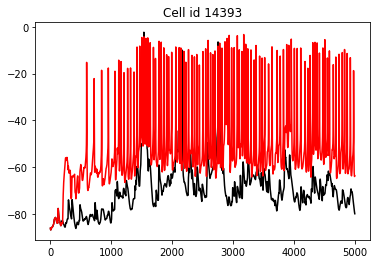

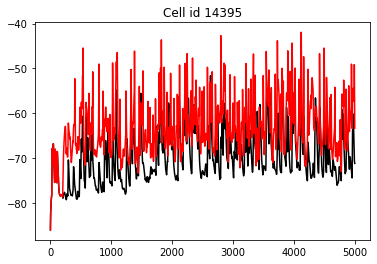

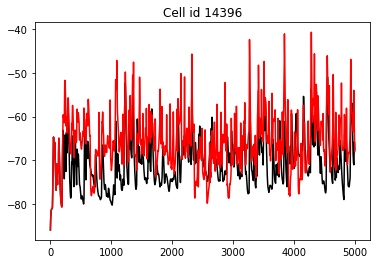

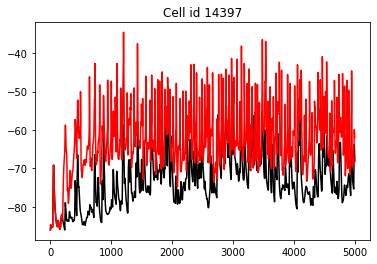

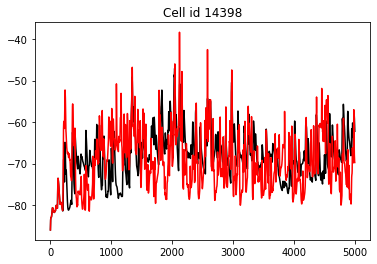

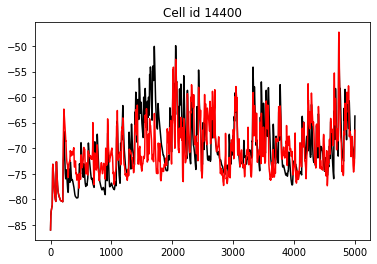

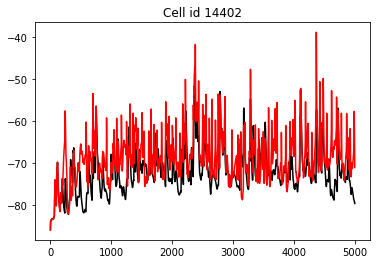

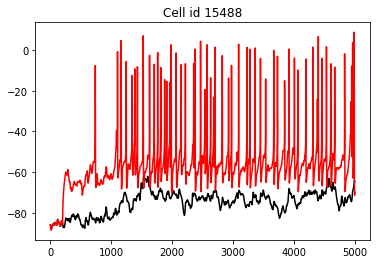

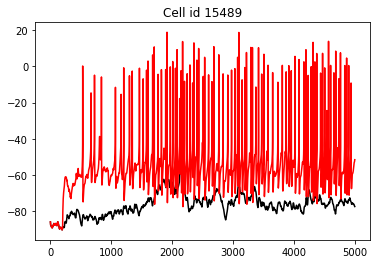

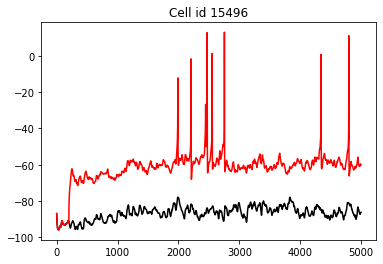

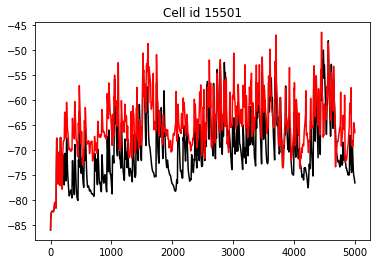

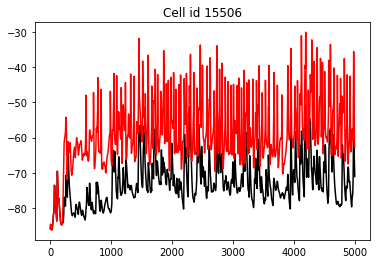

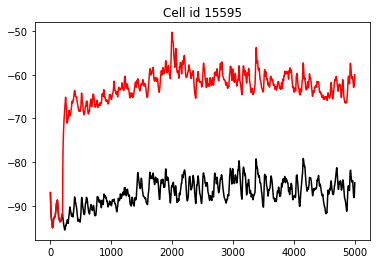

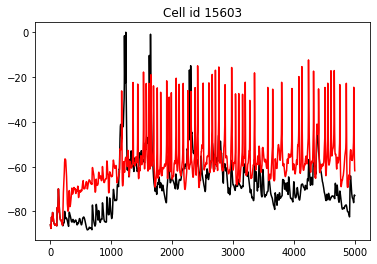

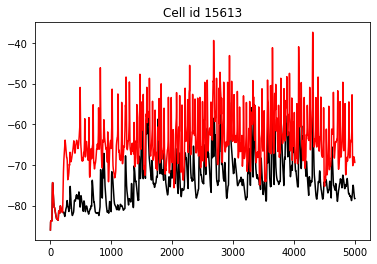

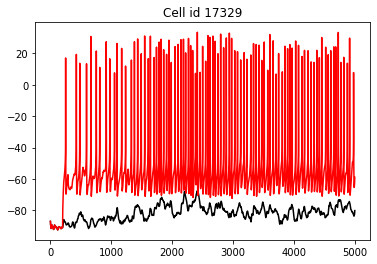

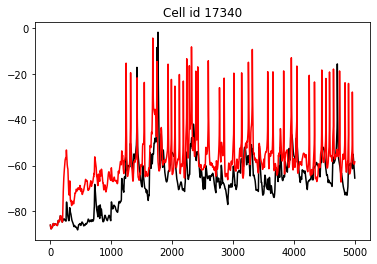

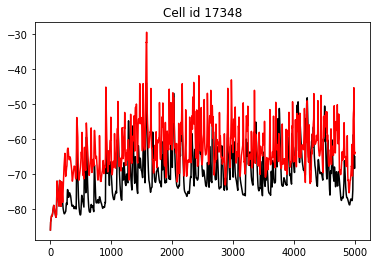

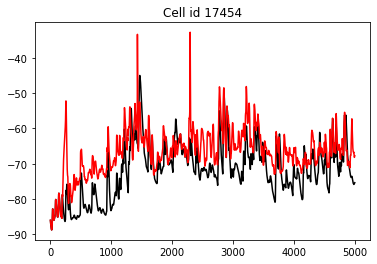

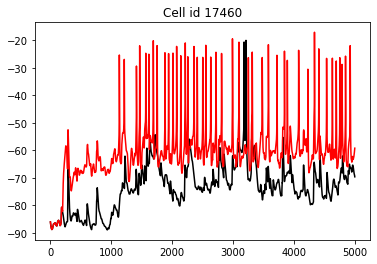

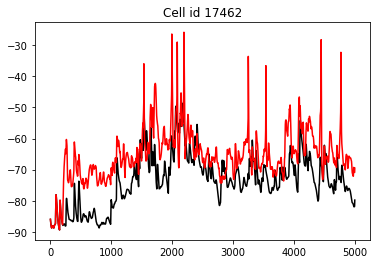

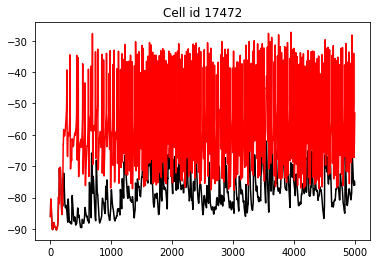

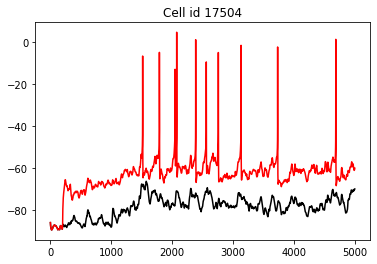

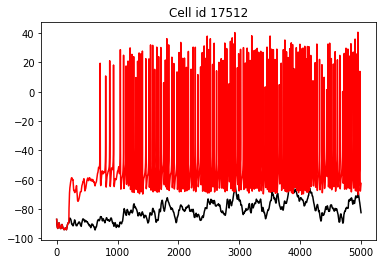

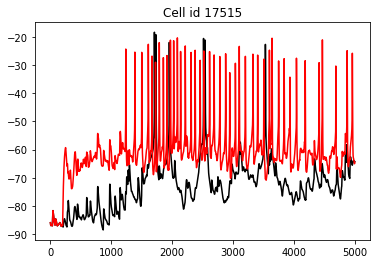

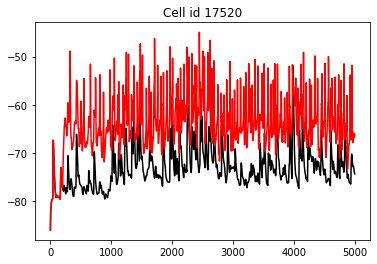

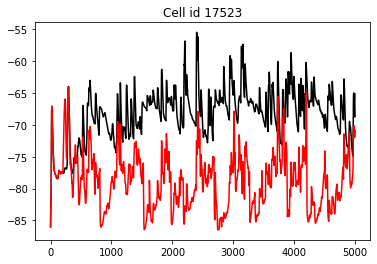

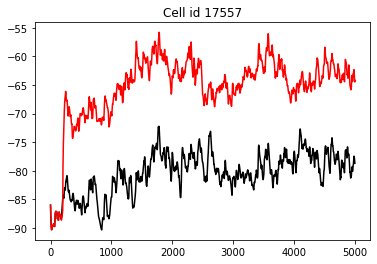

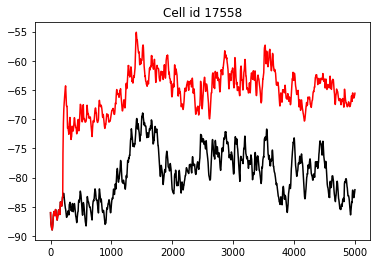

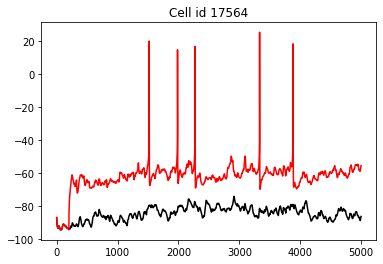

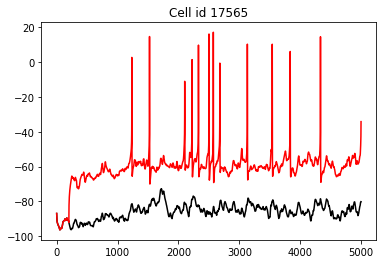

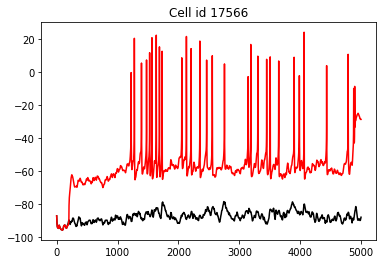

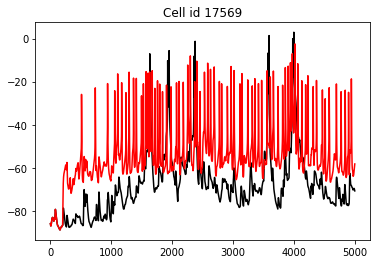

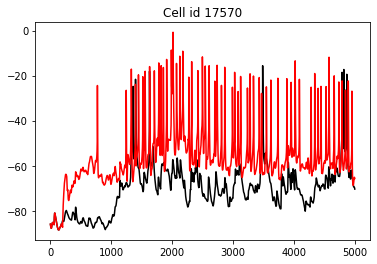

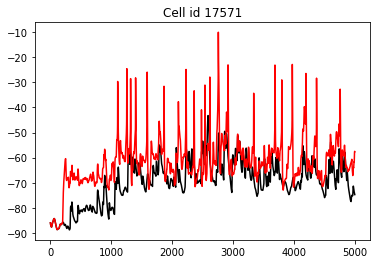

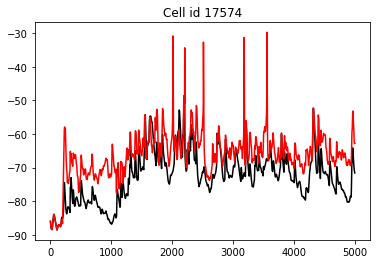

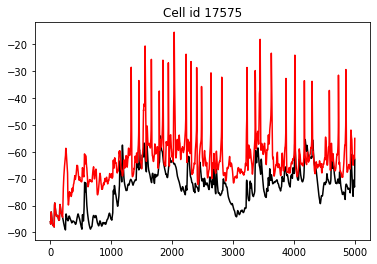

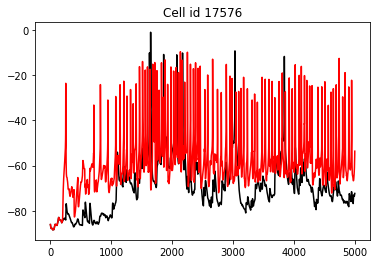

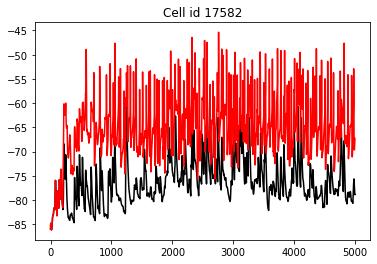

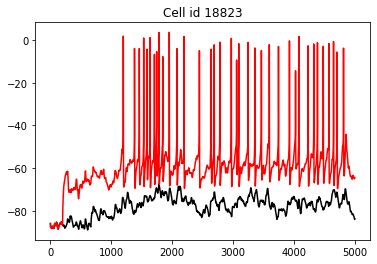

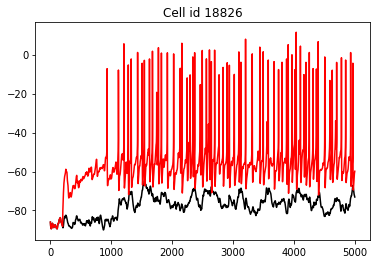

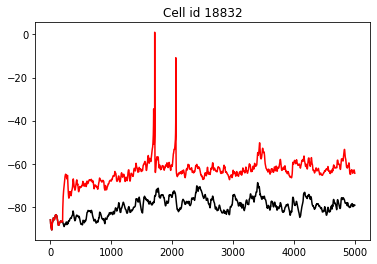

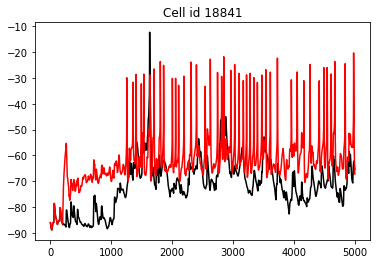

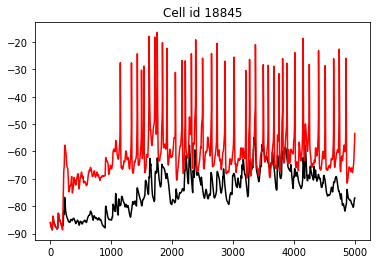

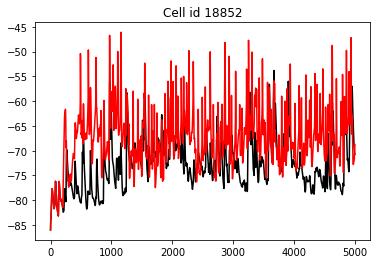

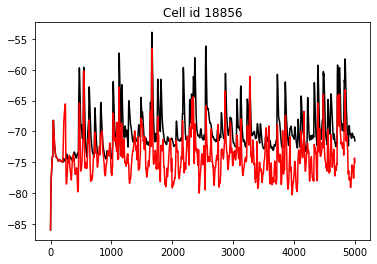

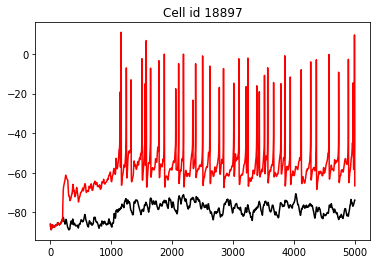

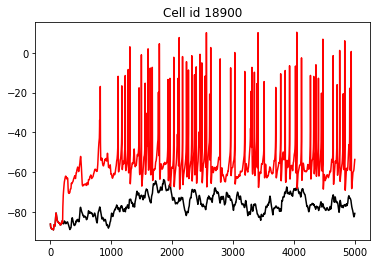

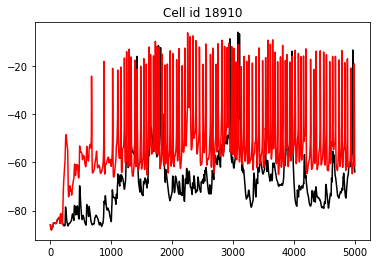

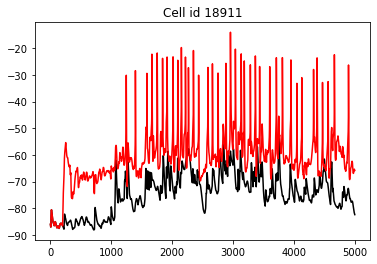

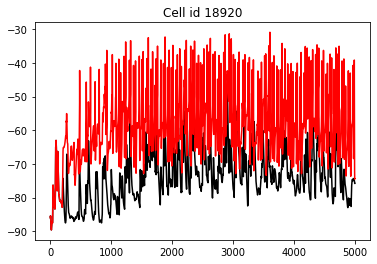

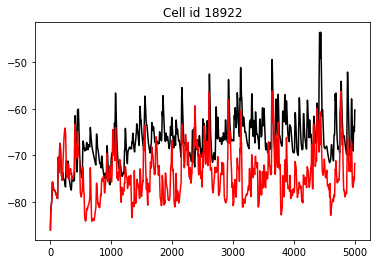

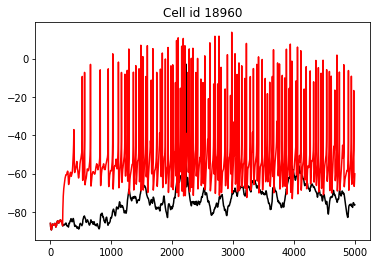

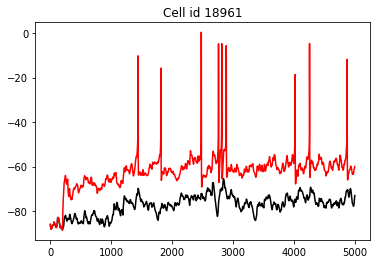

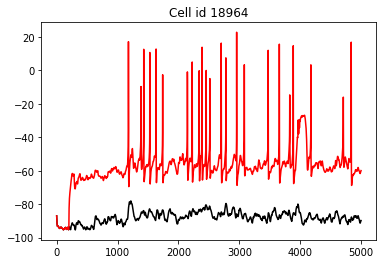

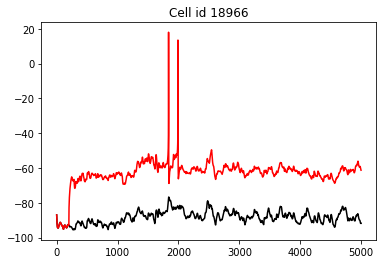

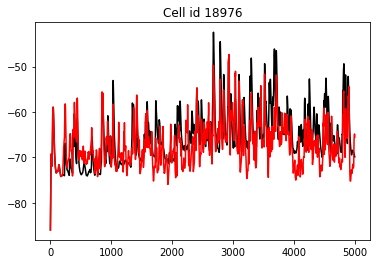

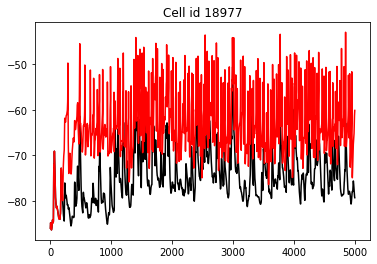

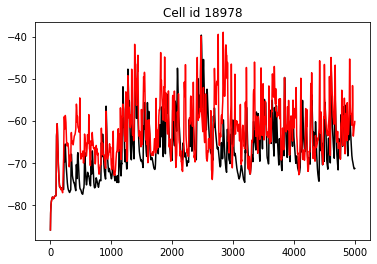

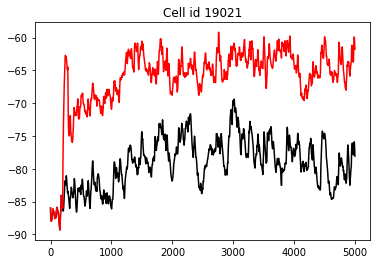

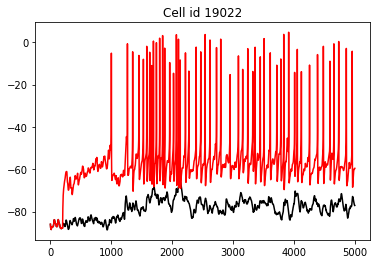

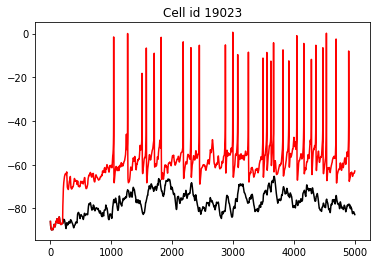

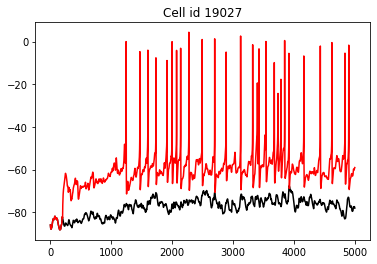

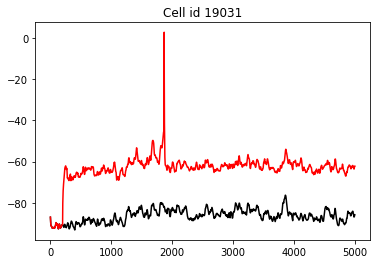

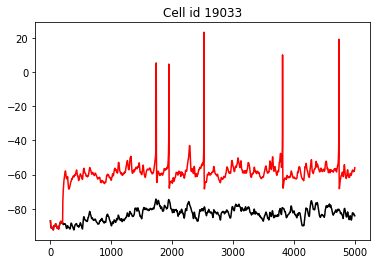

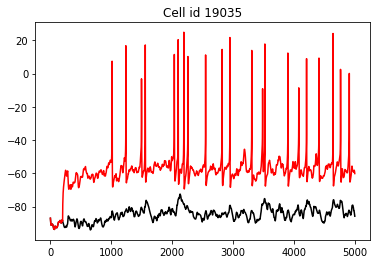

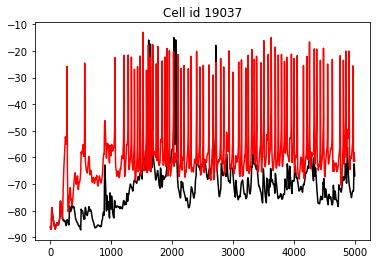

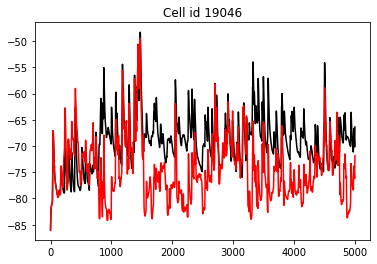

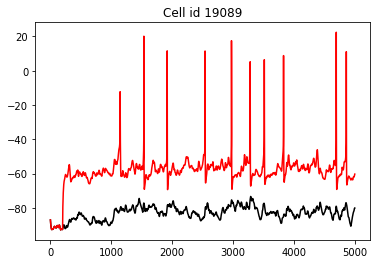

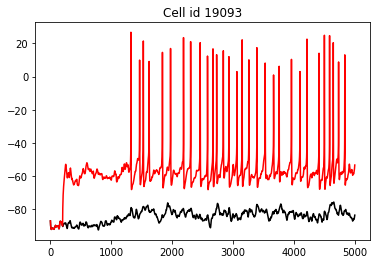

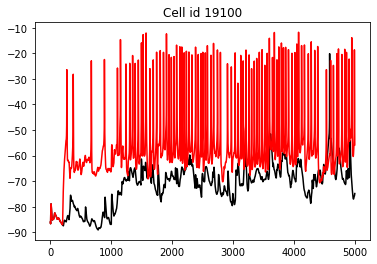

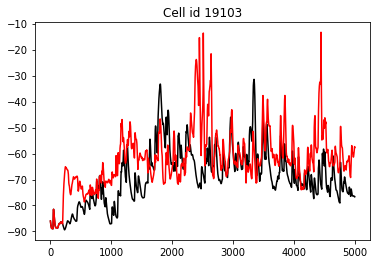

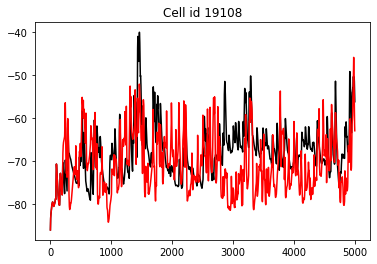

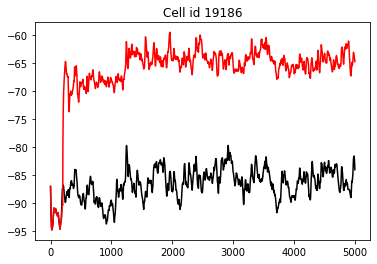

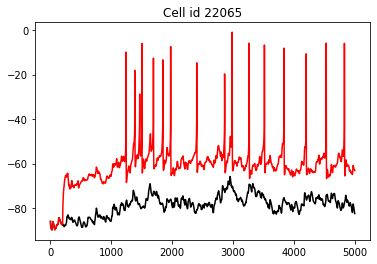

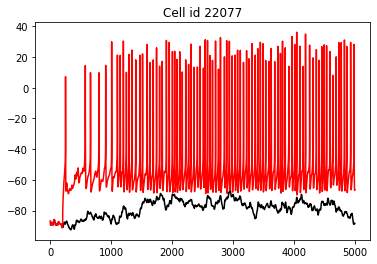

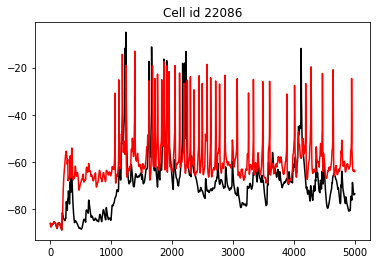

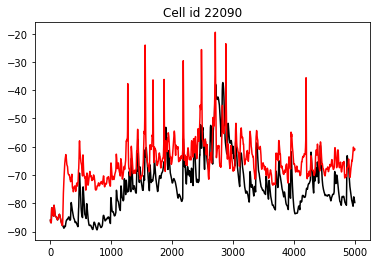

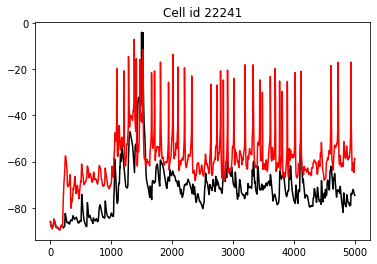

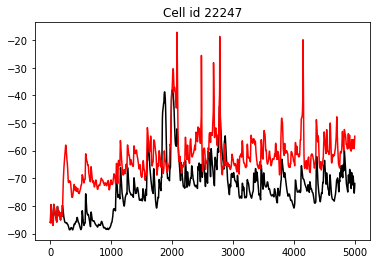

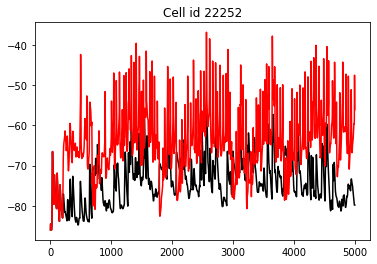

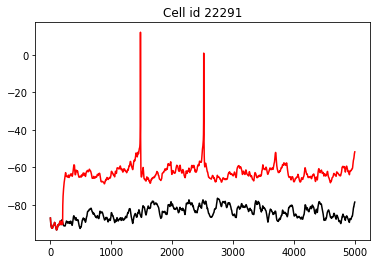

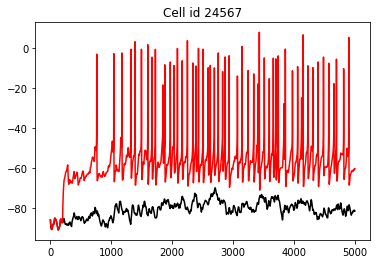

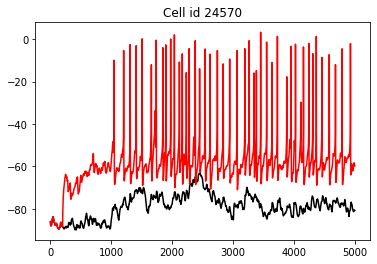

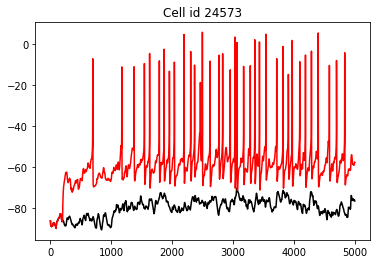

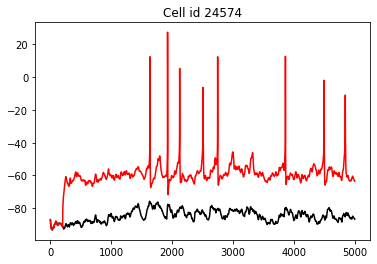

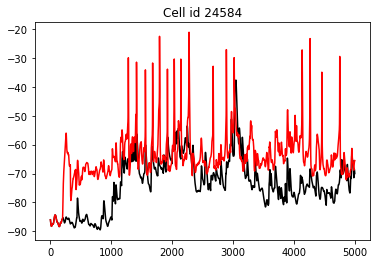

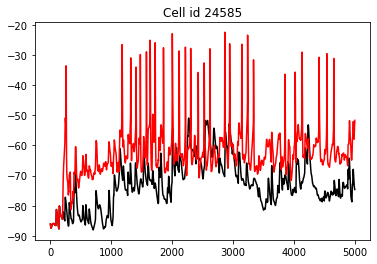

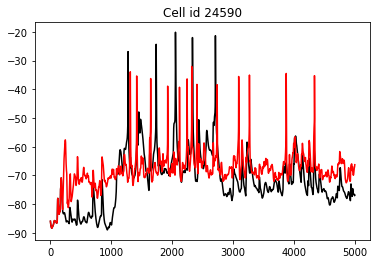

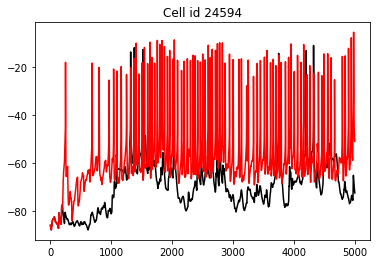

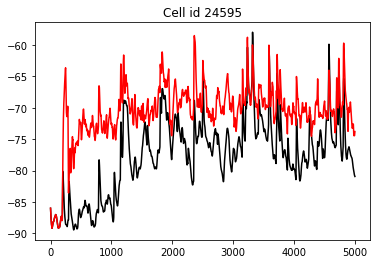

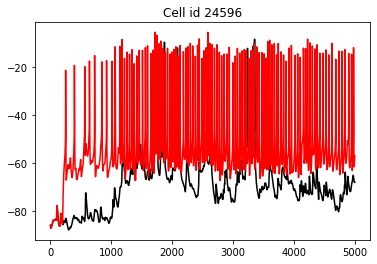

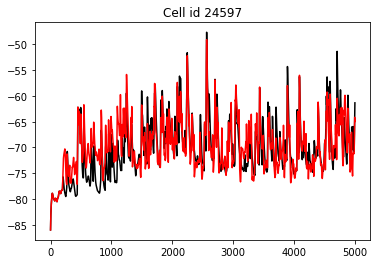

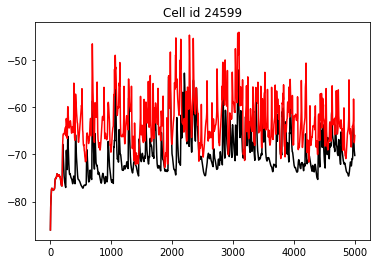

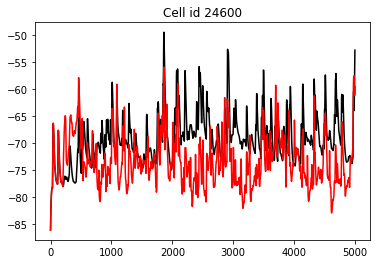

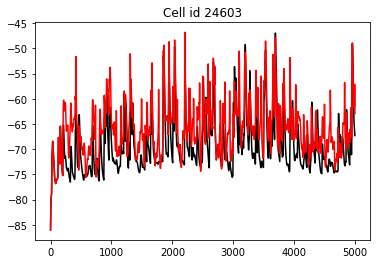

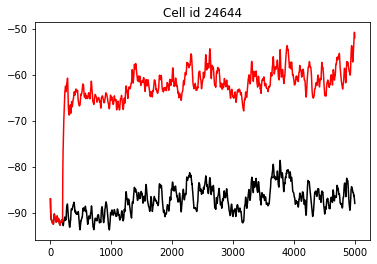

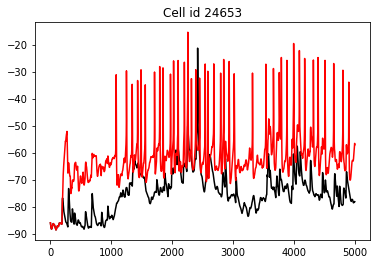

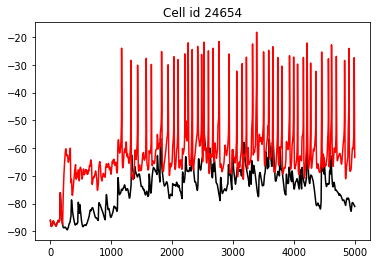

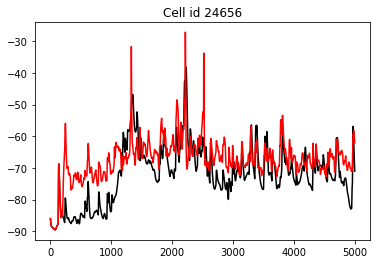

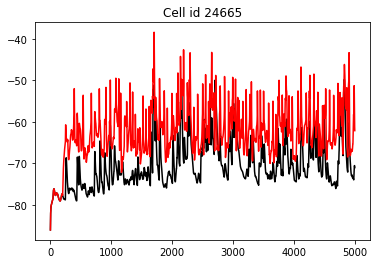

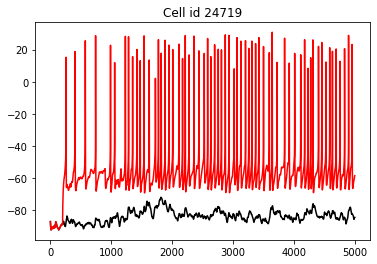

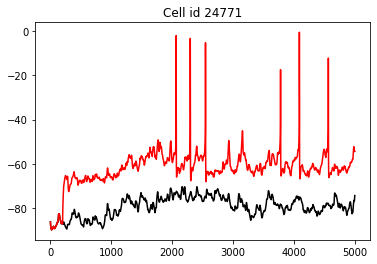

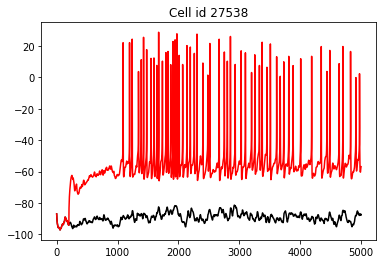

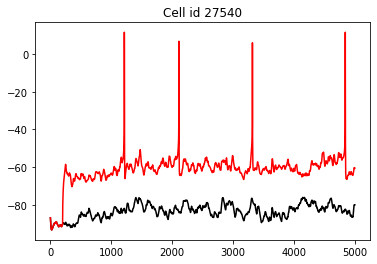

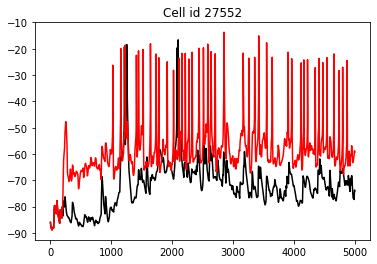

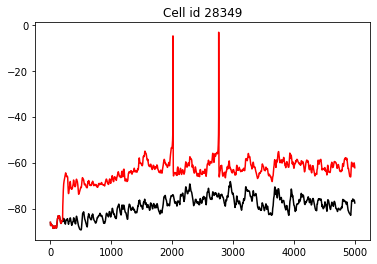

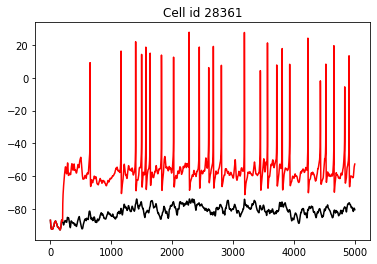

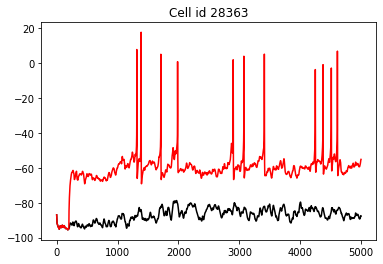

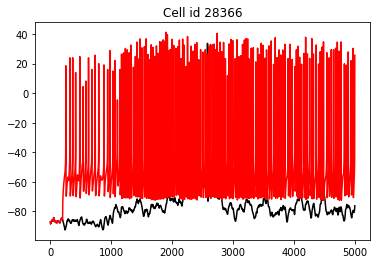

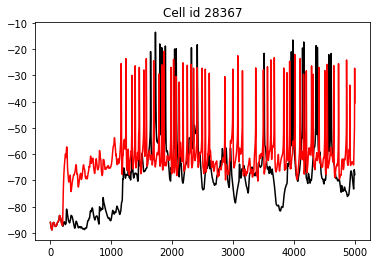

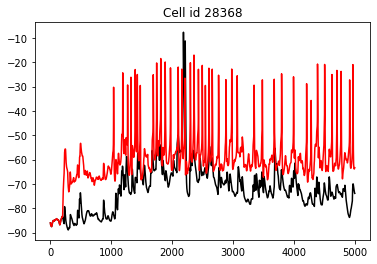

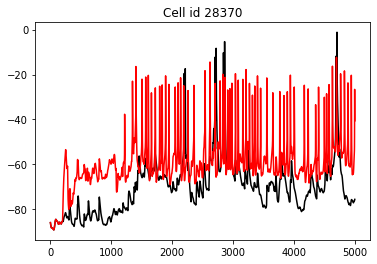

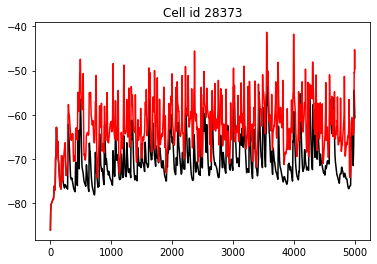

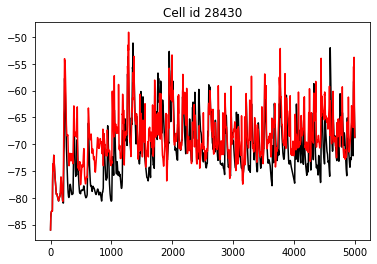

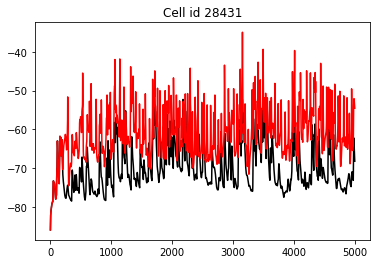

In [14]:
cell_ids_s = cell_ids["iSPN"][::10]+cell_ids["dSPN"]
c = dict(p1_with_ex="black",p1_with_ex_current_injection_presynaptic="red")
for cs in cell_ids_s:
    plt.figure()
    plt.title(f"Cell id {cs}")
    for exp in dendritic_voltage:
        plt.plot(dendritic_voltage[exp][cs][20], color=c[exp])
    plt.show()
    

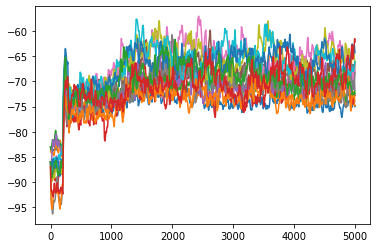

In [15]:
tmp = dict()
tmp_corrected = dict()
skip = 500
import numpy as np

v_s = list()
data = average_dendritic_voltages["p1_with_ex_current_injection_presynaptic"]
for cell_id, v in data.items():

    if np.max(dendritic_voltage[exp][cell_id][1]) < -45:
        plt.plot(v)
        v_s.append(v[skip:])

tmp.update({exp: np.mean(v_s, axis=0)})
tmp_corrected.update({exp: np.mean(v_s, axis=0) - np.min(np.mean(v_s, axis=0))})

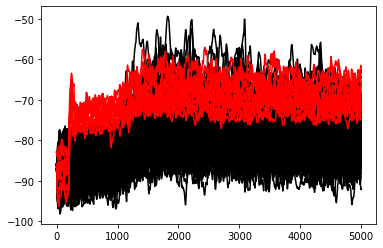

In [16]:
tmp = dict()
tmp_corrected = dict()
skip = 500
import numpy as np
for exp, data in average_dendritic_voltages.items():
    v_s = list()
    for cell_id, v in data.items():
        
        if np.max(dendritic_voltage[exp][cell_id][1]) < -45:
            plt.plot(v, color=c[exp])
            v_s.append(v[skip:])
        
    tmp.update({exp: np.mean(v_s, axis=0)})
    tmp_corrected.update({exp: np.mean(v_s, axis=0) - np.min(np.mean(v_s, axis=0))})

In [17]:
cs = {"p1_with_ex": 'black', 
      "p1_with_ex_current_injection_presynaptic": 'red'}

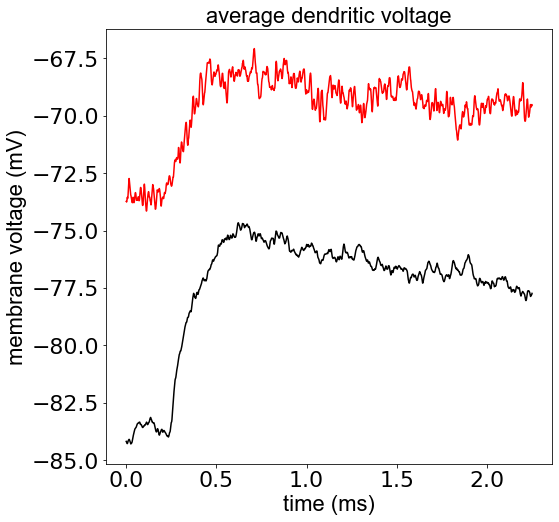

In [18]:
plot_average_dendritic_voltage(tmp, name="dSPN", colors=cs, dt_step=0.5e-3)

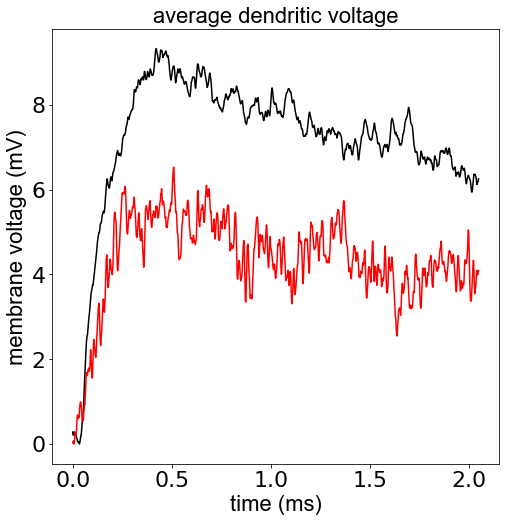

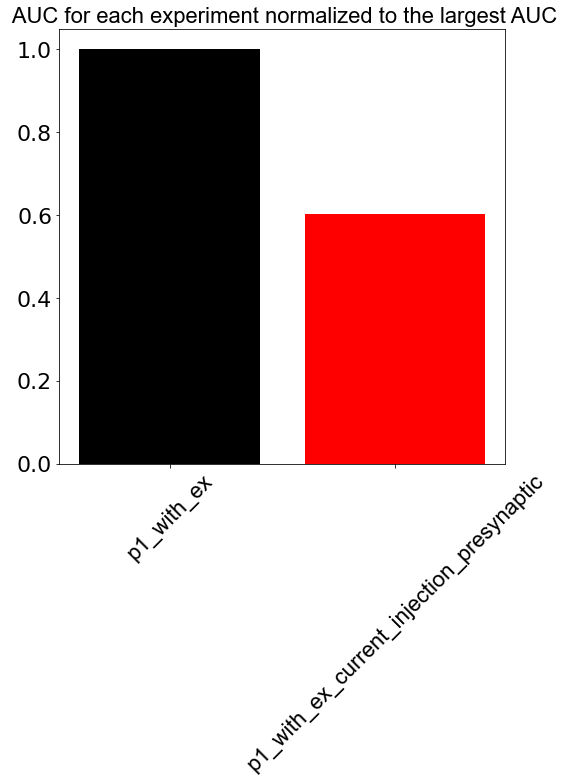

In [32]:

plot_average_dendritic_voltage(tmp_corrected, name="dSPN", colors=cs, dt_step=0.5e-3)
auc = calculate_AUC(tmp, parameters={"dx":0.5e-3})
plot_AUC(auc, experiment_names=e,colors=cs, name="dSPN")